# GammaSim


The simulator for GammaSky can be used by importing the `GammaSim` class as explained below

In [1]:
from gammasim import GammaSim

## Method 1

Choose `select_method=1` to generate exponential waveform defined as piece-wise exponential 
    $$f(t) =
    \begin{cases} 
      0 & \text{ if } t < t_{start} - \tau_1 \\
      \gamma \exp^{a_1 (t-t_{start})} & \text{ if } t_{start} - \tau_1 \leq t < t_{start} \\
      \gamma \exp^{a_2 (t-t_{start})} & \text{ if } t_{start} \leq t \leq t_{start} + \tau_2 \\
      0 & \text{ if } t > t_{start} + \tau_2
    \end{cases}$$
with
   $$a_1 = -\frac{\log(\frac{1}{\gamma})}{\tau_1} \hspace{1cm} \text{ and } \hspace{1cm} a_2 = \frac{\log(\frac{1}{\gamma})}{\tau_2}$$
Here the parameters can be described as follow:
  * $\gamma$ is the value reached by function when `t=t_{start}`, i.e. $f(t_{start})=\gamma$
  * $\tau_1$ is the increasing time, i.e. the number of samples before the peak in `t_{start}` needed by the function to reach the peak value $\gamma$
  * $\tau_2$ is the decreasing time, i.e. the number of samples after the peak in `t_{start}` needed by the function to reach the zero

In [2]:
select_method = 1
gammasim1 = GammaSim(f"config_method{select_method}.json")

In [3]:
gammasim1.generate_dataset(False, True)

  0%|          | 0/1 [00:00<?, ?it/s]

[False False False ... False False False]


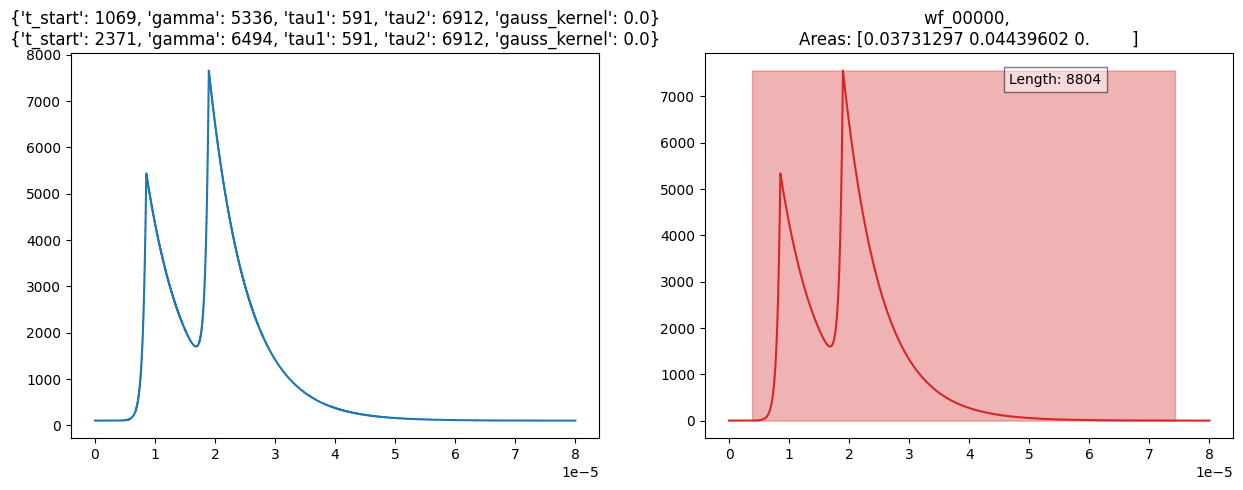

In [4]:
gammasim1.plot_wf(idx="max")

[False False False ... False False False]


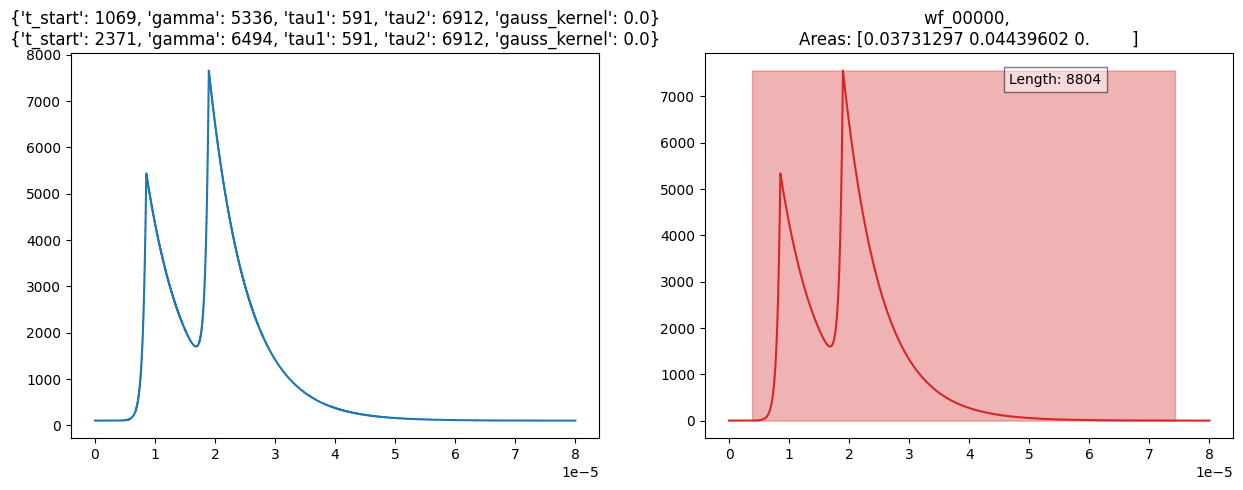

In [5]:
gammasim1.plot_wf(idx="min")

[False False False ... False False False]


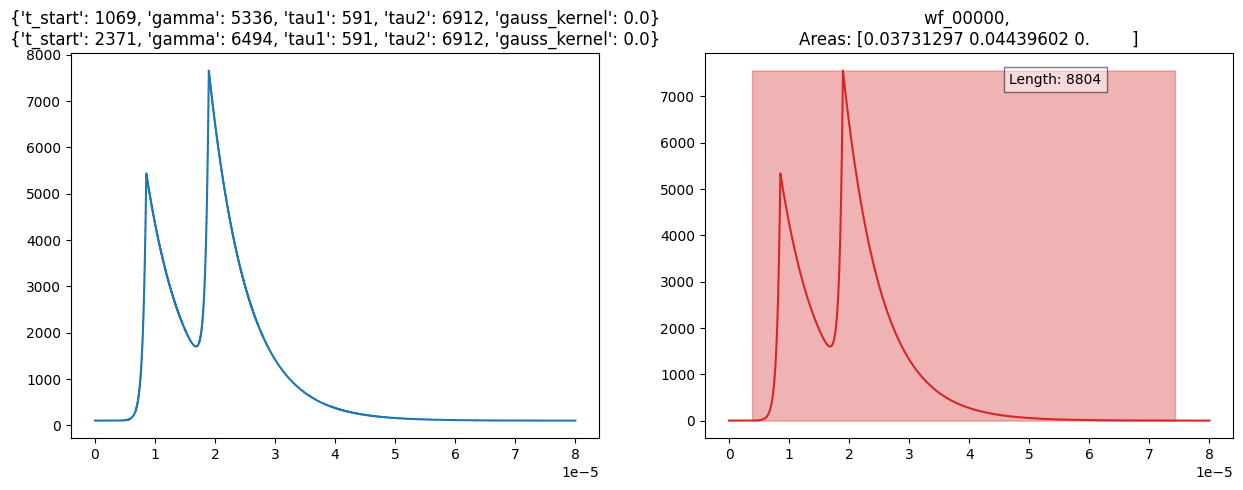

In [6]:
gammasim1.plot_wf(idx="random")

## Method 2

choose `select_method=2` to generate exponential waveform defined as double exponential plus gaussian kernel convolution as defined in paper:

Li, W.; Zhou, Q.; Zhang, Y.; Xie, J.; Zhao, W.; Li, J.; Cui, H. An Ultra-Throughput Boost Method for Gamma-Ray Spectrometers. Energies 2024, 17, 1456. https://doi.org/10.3390/en17061456
    \
    $$f(t) =
    \begin{cases} 
      0 & \text{if } t < t_{start} \\
      f(t) = \gamma \left\{ e^{\left( \frac{2\sigma \tau_1^2}{2} - \frac{t}{\tau_1} \right)} \left[ 1 + \text{erf} \left( \frac{\sqrt{t}}{\sqrt{2\sigma}} - \frac{\sqrt{2\tau_1^2}}{\sigma} \right) \right] - e^{\left( \frac{2\sigma \tau_2^2}{2} - \frac{t}{\tau_2} \right)} \left[ 1 + \text{erf} \left( \frac{\sqrt{t}}{\sqrt{2\sigma}} - \frac{\sqrt{2\tau_2^2}}{\sigma} \right) \right] \right\}
 & \text{if } t >= t_{start} 
    \end{cases} $$
where:
  * $\gamma$ is the amplitude of the model. $
  * $\tau_1$ and $\tau_2$ are the rising and decaying time constant of the double exponential, expressed in seconds.
  * $\sigma$ is the standard deviation of the gaussian kernel, expressed in seconds.

Check README.md for description of all the configuration parameters of the simulator. 

In [7]:
select_method = 1
gammasim = GammaSim(f"config_method{select_method}.json")

In [8]:
gammasim.generate_dataset(False, True)

  0%|          | 0/1 [00:00<?, ?it/s]

[False False False ... False False False]


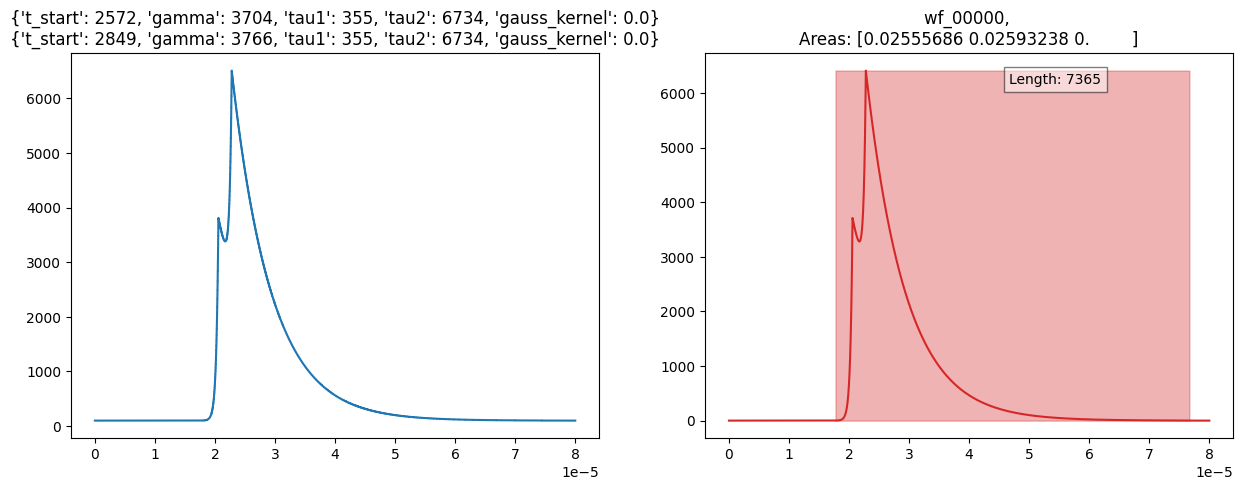

In [9]:
gammasim.plot_wf(idx="max")

[False False False ... False False False]


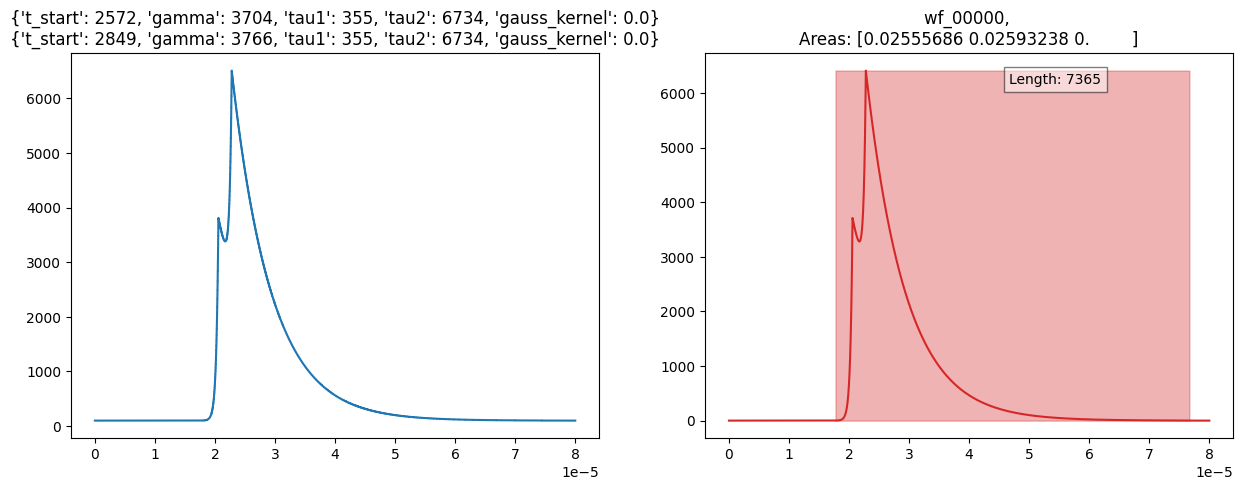

In [10]:
gammasim.plot_wf(idx="min")

[False False False ... False False False]


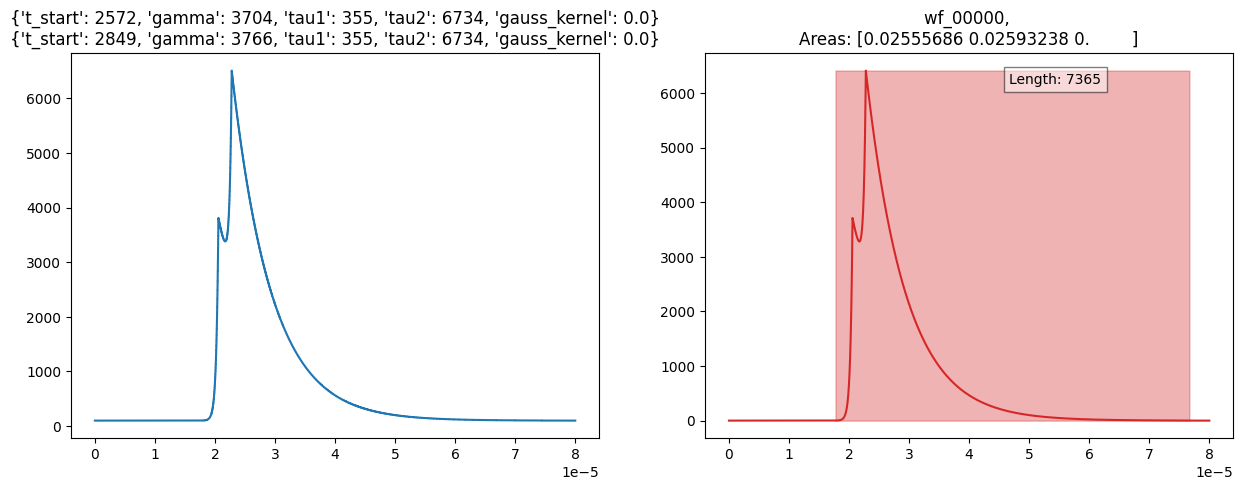

In [11]:
gammasim.plot_wf(idx="random")